In [41]:
import pandas as pd
import openpyxl
import numpy as np
import os
import glob2
import glob
import random
import sklearn
import ntpath
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from nltk.test.portuguese_en_fixt import setup_module
import nltk
from contextlib import nullcontext
import unicodedata
import plotly
import read_file_exec as rfe
## Puxada dos dados modelados do processo de extração
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm

In [42]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(42)

In [43]:
## Puxada dos dados modelados do processo de extração
dados_modelo_categoria = rfe.read_file('features/dados_modelo_categoria.xlsx').get_df()
dados_modelo_produto = rfe.read_file('features/dados_modelo_produto.xlsx').get_df()


In [44]:
dados_linha = dados_modelo_categoria.query('categoria == "linha"')
dados_la = dados_modelo_categoria.query('categoria == "la"')
dados_armarinho = dados_modelo_categoria.query('categoria == "armarinho"')

In [45]:
print(dados_linha)
print(dados_la)
print(dados_armarinho)

     categoria   data_dia   ano  mes  mes_ano  quant_  qtd_norm   total
939      linha 2020-09-13  2020    9  2020-09    21.0  0.020892  221.50
940      linha 2020-09-14  2020    9  2020-09    41.0  0.040820  307.54
941      linha 2020-09-15  2020    9  2020-09    49.0  0.048802  805.90
942      linha 2020-09-16  2020    9  2020-09    38.0  0.037844  307.20
943      linha 2020-09-17  2020    9  2020-09    57.0  0.056706  458.60
...        ...        ...   ...  ...      ...     ...       ...     ...
1472     linha 2022-07-26  2022    7  2022-07    18.0  0.017910  269.25
1473     linha 2022-07-27  2022    7  2022-07    13.0  0.012922  219.98
1474     linha 2022-07-28  2022    7  2022-07     8.0  0.007958  109.10
1475     linha 2022-07-29  2022    7  2022-07    13.0  0.012946   67.54
1476     linha 2022-07-30  2022    7  2022-07     2.0  0.001988    6.00

[538 rows x 8 columns]
    categoria   data_dia   ano  mes  mes_ano  quant_  qtd_norm   total
533        la 2020-09-14  2020    9  2020

In [46]:
#most sold product in each category by month
df = dados_modelo_produto.groupby(['categoria', 'mes_ano', 'codigo']).sum().reset_index().sort_values(by=['mes_ano','quant_'], ascending=False)
df

,categoria,mes_ano,codigo,numero,ano,mes,quant_,qtd_norm,total
3607,armarinho,2022-07,7101619,415683,22242,77,1052.0,1.051940,189.18
3535,armarinho,2022-07,7099759,38252,2022,7,100.0,0.099995,28.00
3589,armarinho,2022-07,7101466,37781,2022,7,100.0,0.099995,6.00
3602,armarinho,2022-07,7101592,227196,12132,42,91.0,0.090965,31.48
3649,armarinho,2022-07,8099816,226143,12132,42,53.0,0.052964,26.38
...,...,...,...,...,...,...,...,...,...
5431,linha,2020-09,N126100-005838,11659,2020,9,1.0,0.000994,2.00
5433,linha,2020-09,N126100-005880,11659,2020,9,1.0,0.000994,2.00
5436,linha,2020-09,N126100-05842,12212,2020,9,1.0,0.000994,2.00
5437,linha,2020-09,N126100-05916,12304,2020,9,1.0,0.000994,2.00


In [48]:

df2 = df.query('categoria == "linha"')
df2['taxa_participacao'] = df.groupby(['categoria','codigo'])['quant_'].apply(lambda x: x/x.sum())

df2.sort_values(by=['taxa_participacao'], ascending=False)

,categoria,mes_ano,codigo,numero,ano,mes,quant_,qtd_norm,total,taxa_participacao
5439,linha,2020-09,N126100-5819,12577,2020,9,1.0,0.000994,2.00,1.000000
7055,linha,2021-05,96909144,22409,2021,5,1.0,0.000994,15.00,1.000000
7114,linha,2021-05,099869,22266,2021,5,1.0,0.000994,16.11,1.000000
7106,linha,2021-05,099813,22237,2021,5,1.0,0.000994,17.50,1.000000
9618,linha,2022-05,099146,36265,2022,5,1.0,0.000994,12.13,1.000000
...,...,...,...,...,...,...,...,...,...,...
7020,linha,2021-04,98010,21618,2021,4,2.0,0.001994,20.00,0.010256
6783,linha,2021-03,98010,20223,2021,3,1.0,0.000994,9.94,0.005128
8303,linha,2021-10,98010,27988,2021,10,1.0,0.000994,12.90,0.005128
8935,linha,2022-01,98010,31012,2022,1,1.0,0.000994,12.90,0.005128


## Estacionaridade 
A hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (tem alguma estrutura dependente do tempo). A hipótese alternativa (rejeitar a hipótese nula) é que a série cronológica é estacionária.

Hipótese nula (H0): Se não for rejeitada, sugere que a série cronológica tem uma raiz unitária, o que significa que não é estacionária. Tem alguma estrutura dependente do tempo.
Hipótese alternativa (H1): A hipótese nula é rejeitada; sugere que a série cronológica não tem uma raiz unitária, o que significa que é estacionária. Não tem uma estrutura dependente do tempo.
Interpretamos este resultado utilizando o valor p do teste. Um valor p abaixo de um limiar (como 5% ou 1%) sugere que rejeitamos a hipótese nula (estacionária), caso contrário, um valor p acima do limiar sugere que não rejeitamos a hipótese nula (não estacionária).

* p-valor > 0,05: Não rejeitar a hipótese nula (H0), os dados têm uma raiz unitária e são não-estacionários.
* p-valor <= 0,05: Rejeitar a hipótese nula (H0), os dados não têm uma raiz unitária e são estacionários.

Referente ao teste de Dickey-Fulley é tido que se seu valor é menor que o valores críticos, tem-se sua significância estatística. Por exemplo, caso seu teste seja menor que o valor límitrofe dos seus 1% de seus valores críticos, 
isto sugere que podemos rejeitar a hipótese nula com um nível de significância inferior a 1% (ou seja, uma probabilidade baixa de que o resultado seja uma casualidade estatística).


In [8]:
''' Teste para ampliação do modelo'''
'''
def check_stationarity(ts):
    dftest = adfuller(ts)
    dftest2 = adfuller(ts.diff().dropna())
    dftest3 = adfuller(ts.diff().diff().dropna())
    adf = dftest[0]
    adf2 = dftest2[0]
    adf3 = dftest3[0]
    pvvalue = dftest[1]
    pvvalue2 = dftest2[1]
    pvvalue3 = dftest3[1]
    critical_value = dftest[4]
    critical_value2 = dftest2[4]
    critical_value3 = dftest3[4]
    print('Results of Dickey-Fuller Test:')
    print('Test Statistic: ', adf)
    print('p-value: ', pvvalue)
    print('Critical Values:')
    for key, value in critical_value.items():
	    print('\t%s: %.3f' % (key, value))
    print('Results of Dickey-Fuller Test 2:')
    print('Test Statistic: ', adf2)
    print('p-value: ', pvvalue2)
    print('Critical Values:')
    for key, value in critical_value2.items():
        print('\t%s: %.3f' % (key, value))

    print('Results of Dickey-Fuller Test 3:')
    print('Test Statistic: ', adf3)
    print('p-value: ', pvvalue3)
    print('Critical Values:')
    for key, value in critical_value3.items():
        print('\t%s: %.3f' % (key, value))

    return adf, adf2, adf3, pvvalue, pvvalue2, pvvalue3, critical_value, critical_value2, critical_value3
        
#    pvalue = dftest[1]
#   critical_value = dftest[4]['5%']
#   if (pvalue < 0.05) and (adf < critical_value):
#       print('The series is stationary')
#       print('ADF Statistic: %f' % dftest[0])
#       print('p-value: %f' % dftest[1])
#       print('Critical Values:')
#       for key, value in dftest[4].items():
#           print('\t%s: %.3f' % (key, value))
#
#   else:
#       print('The series is NOT stationary')
#       print('ADF Statistic: %f' % dftest[0])
#       print('p-value: %f' % dftest[1])
#       print('Critical Values:')
#       for key, value in dftest[4].items():
#           print('\t%s: %.3f' % (key, value))
#   
'''

"\ndef check_stationarity(ts):\n    dftest = adfuller(ts)\n    dftest2 = adfuller(ts.diff().dropna())\n    dftest3 = adfuller(ts.diff().diff().dropna())\n    adf = dftest[0]\n    adf2 = dftest2[0]\n    adf3 = dftest3[0]\n    pvvalue = dftest[1]\n    pvvalue2 = dftest2[1]\n    pvvalue3 = dftest3[1]\n    critical_value = dftest[4]\n    critical_value2 = dftest2[4]\n    critical_value3 = dftest3[4]\n    print('Results of Dickey-Fuller Test:')\n    print('Test Statistic: ', adf)\n    print('p-value: ', pvvalue)\n    print('Critical Values:')\n    for key, value in critical_value.items():\n\t    print('\t%s: %.3f' % (key, value))\n    print('Results of Dickey-Fuller Test 2:')\n    print('Test Statistic: ', adf2)\n    print('p-value: ', pvvalue2)\n    print('Critical Values:')\n    for key, value in critical_value2.items():\n        print('\t%s: %.3f' % (key, value))\n\n    print('Results of Dickey-Fuller Test 3:')\n    print('Test Statistic: ', adf3)\n    print('p-value: ', pvvalue3)\n    p

In [49]:
from statsmodels.tsa.stattools import adfuller

adf_tests = pd.DataFrame()

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    return dfoutput




In [50]:
df_stactionarity = pd.DataFrame()


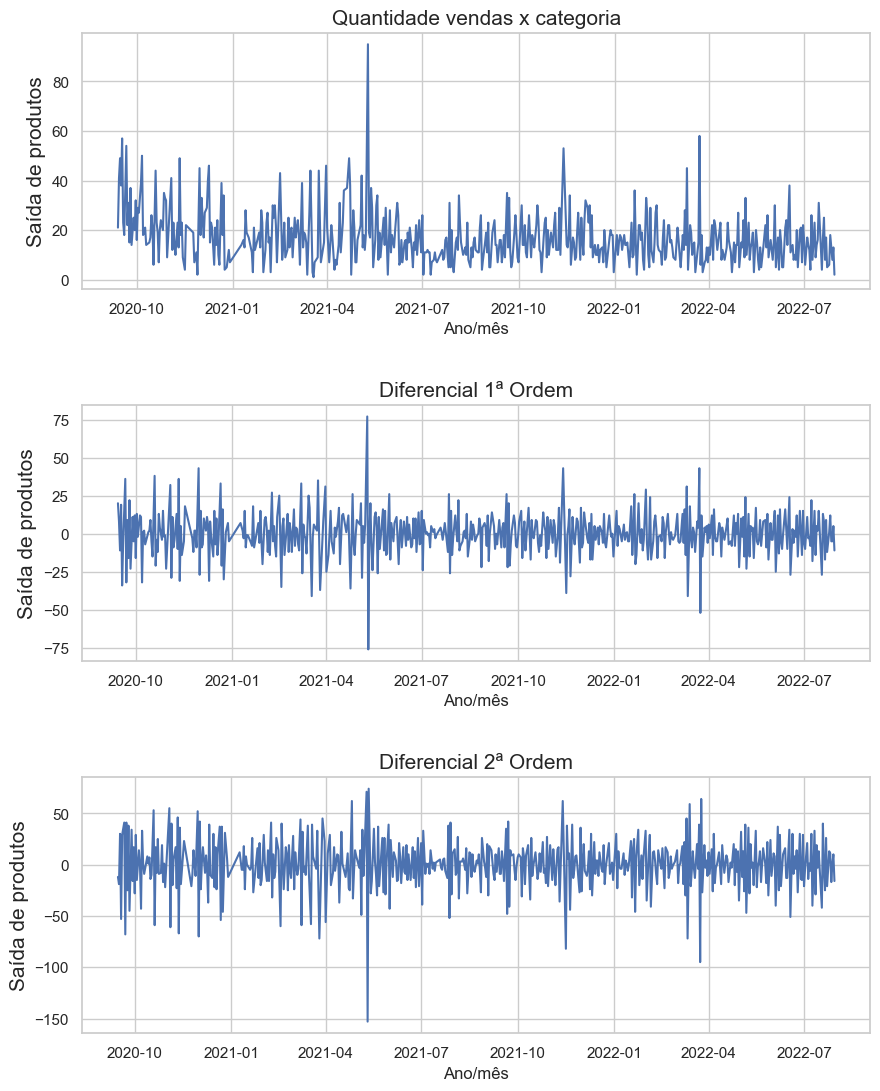

In [51]:
# Correct plot of figure

fig,axes = plt.subplots(3, figsize=(10,12))
fig.tight_layout(pad=5)
axes[0].set_title('Quantidade vendas x categoria', fontsize=15)
axes[0].set_xlabel('Ano/mês', fontsize=12)
axes[0].set_ylabel('Saída de produtos', fontsize=15)
axes[1].set_title('Diferencial 1ª Ordem', fontsize=15)
axes[1].set_ylabel('Saída de produtos', fontsize=15)
axes[1].set_xlabel('Ano/mês', fontsize=12)
axes[2].set_title('Diferencial 2ª Ordem', fontsize=15)
axes[2].set_ylabel('Saída de produtos', fontsize=15)
axes[2].set_xlabel('Ano/mês', fontsize=12)
a = sns.lineplot(x='data_dia', y='quant_', data=dados_linha,ax=axes[0])
#a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#a.set_yticklabels(a.get_yticklabels(), fontsize=12)
b = sns.lineplot(x='data_dia', y=(dados_linha['quant_'].diff()), data=dados_linha,ax=axes[1]) #0
#b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#b.set_yticklabels(b.get_yticklabels(), fontsize=12)
c = sns.lineplot(x='data_dia', y=(dados_linha['quant_'].diff().diff()), data=dados_linha,ax=axes[2]) #
#c.set_xticklabels(c.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#c.set_yticklabels(c.get_yticklabels(), fontsize=12)      


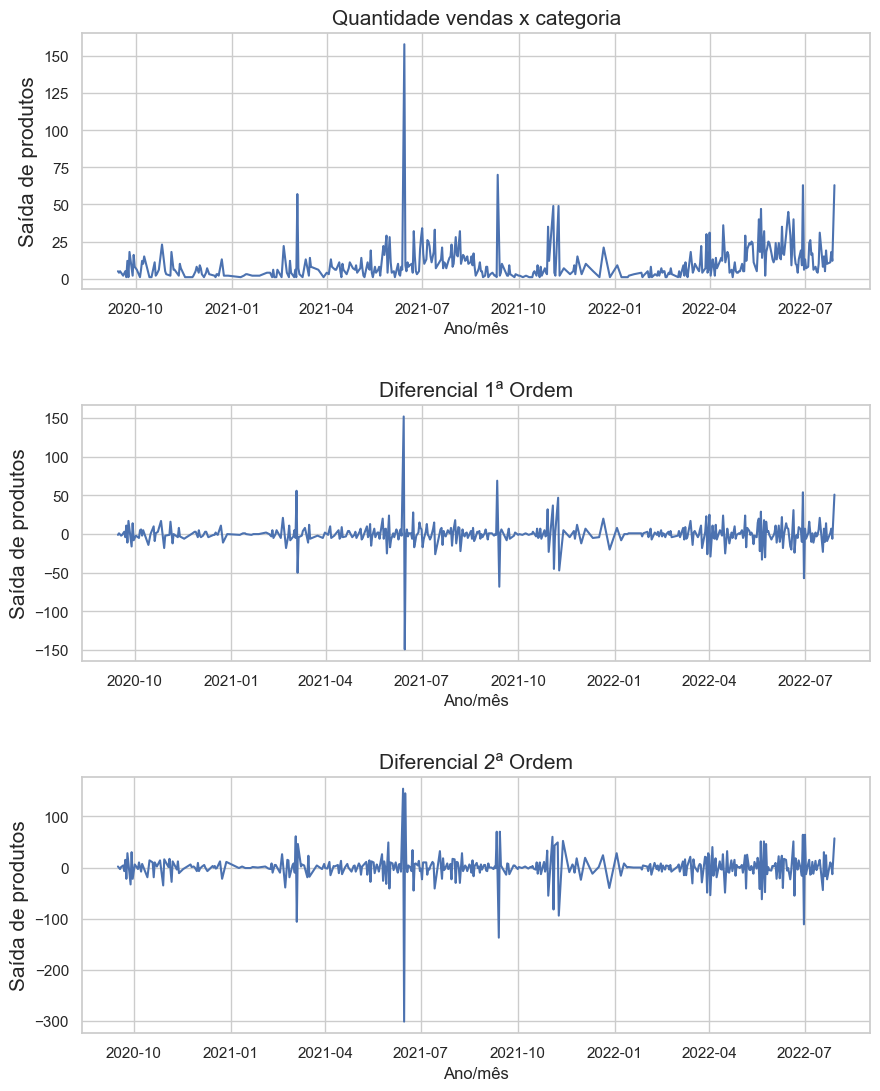

In [53]:
# Correct plot of figure

fig,axes = plt.subplots(3, figsize=(10,12))
fig.tight_layout(pad=5)
axes[0].set_title('Quantidade vendas x categoria', fontsize=15)
axes[0].set_xlabel('Ano/mês', fontsize=12)
axes[0].set_ylabel('Saída de produtos', fontsize=15)
axes[1].set_title('Diferencial 1ª Ordem', fontsize=15)
axes[1].set_ylabel('Saída de produtos', fontsize=15)
axes[1].set_xlabel('Ano/mês', fontsize=12)
axes[2].set_title('Diferencial 2ª Ordem', fontsize=15)
axes[2].set_ylabel('Saída de produtos', fontsize=15)
axes[2].set_xlabel('Ano/mês', fontsize=12)
a = sns.lineplot(x='data_dia', y='quant_', data=dados_la,ax=axes[0])
#a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#a.set_yticklabels(a.get_yticklabels(), fontsize=12)
b = sns.lineplot(x='data_dia', y=(dados_la['quant_'].diff()), data=dados_la,ax=axes[1]) #0
#b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#b.set_yticklabels(b.get_yticklabels(), fontsize=12)
c = sns.lineplot(x='data_dia', y=(dados_la['quant_'].diff().diff()), data=dados_la,ax=axes[2]) #
#c.set_xticklabels(c.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#c.set_yticklabels(c.get_yticklabels(), fontsize=12)      


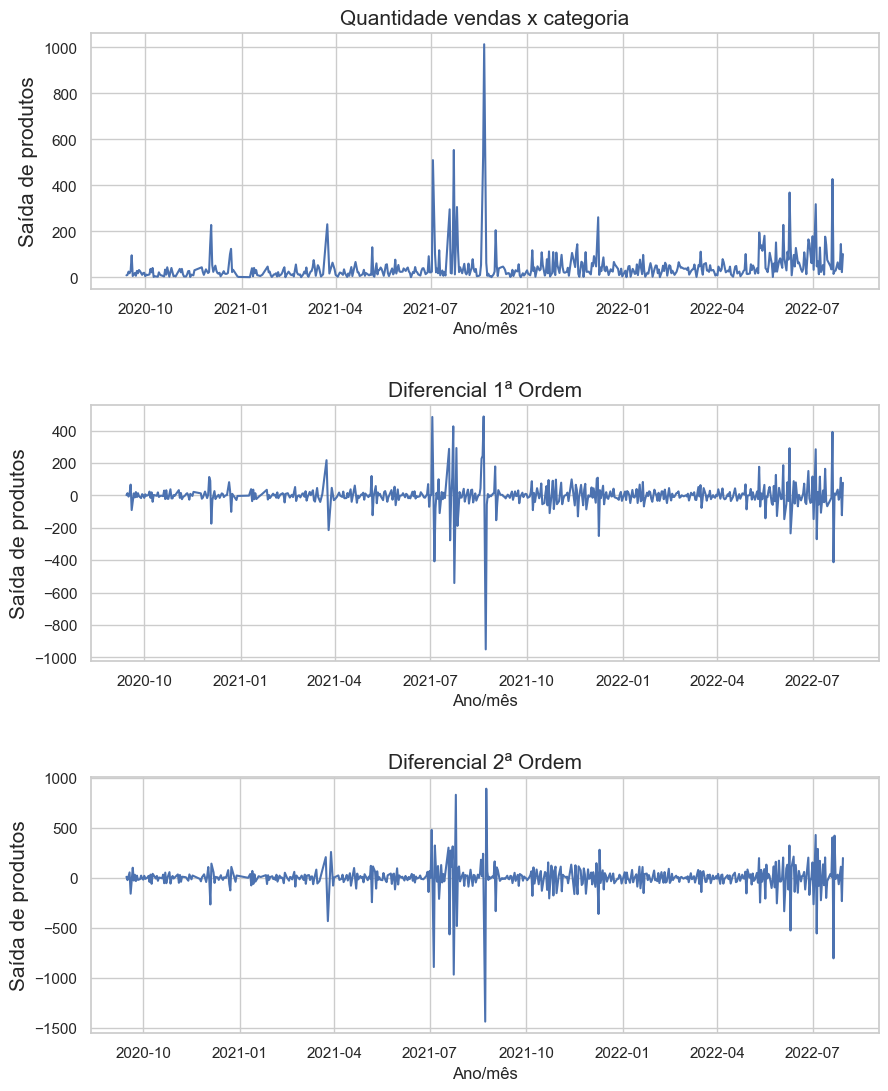

In [54]:
# Correct plot of figure

fig,axes = plt.subplots(3, figsize=(10,12))
fig.tight_layout(pad=5)
axes[0].set_title('Quantidade vendas x categoria', fontsize=15)
axes[0].set_xlabel('Ano/mês', fontsize=12)
axes[0].set_ylabel('Saída de produtos', fontsize=15)
axes[1].set_title('Diferencial 1ª Ordem', fontsize=15)
axes[1].set_ylabel('Saída de produtos', fontsize=15)
axes[1].set_xlabel('Ano/mês', fontsize=12)
axes[2].set_title('Diferencial 2ª Ordem', fontsize=15)
axes[2].set_ylabel('Saída de produtos', fontsize=15)
axes[2].set_xlabel('Ano/mês', fontsize=12)
a = sns.lineplot(x='data_dia', y='quant_', data=dados_armarinho,ax=axes[0])
#a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#a.set_yticklabels(a.get_yticklabels(), fontsize=12)
b = sns.lineplot(x='data_dia', y=(dados_armarinho['quant_'].diff()), data=dados_armarinho,ax=axes[1]) #0
#b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#b.set_yticklabels(b.get_yticklabels(), fontsize=12)
c = sns.lineplot(x='data_dia', y=(dados_armarinho['quant_'].diff().diff()), data=dados_armarinho,ax=axes[2]) #
#c.set_xticklabels(c.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
#c.set_yticklabels(c.get_yticklabels(), fontsize=12)      


--------------------------------------------------
Gráfico de autocorrelação parcial
--------------------------------------------------


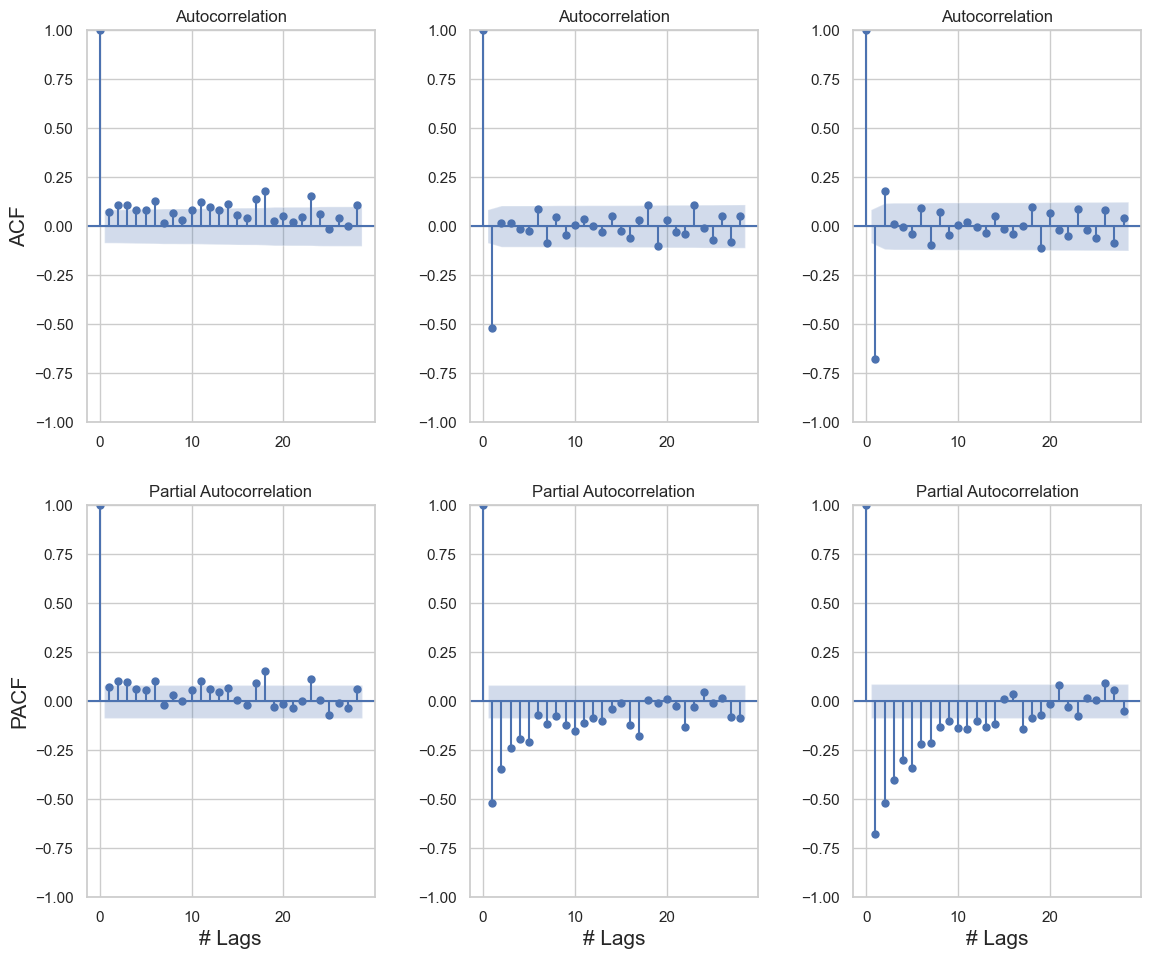

Results of Dickey-Fuller Test:
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Results of 

In [55]:
# Correct plot of figures

fig,axes = plt.subplots(2,3,figsize=(12,10))
fig.tight_layout(pad=3)
axes[0,0].set_title('ACF sem diferencial', fontsize=10)
axes[0,0].set_ylabel('ACF', fontsize=15)
axes[0,1].set_title('PACF sem diferencial', fontsize=10)
axes[0,1].set_title('ACF Diferencial 1ª Ordem', fontsize = 10)
axes[0,2].set_title('ACF Diferencial 2ª Ordem', fontsize = 10)
axes[1,0].set_title('PACF sem diferencial', fontsize = 10)
axes[1,0].set_ylabel('PACF', fontsize = 15)
axes[1,1].set_title('PACF Diferencial 1ª Ordem', fontsize = 10)
axes[1,2].set_title('PACF Diferencial 2ª Ordem', fontsize = 10)
axes[1,0].set_xlabel('# Lags', fontsize = 15)
axes[1,1].set_xlabel('# Lags', fontsize = 15)
axes[1,2].set_xlabel('# Lags', fontsize = 15)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
try:
    plot_acf(dados_linha['quant_'],ax=axes[0,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_linha['quant_'].diff().dropna(),ax=axes[0,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_linha['quant_'].diff().diff().dropna(),ax=axes[0,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_linha['quant_'],ax=axes[1,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_linha['quant_'].diff().dropna(),ax=axes[1,1]) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_linha['quant_'].diff().diff().dropna(),ax=axes[1,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_linha['quant_']))  
df = pd.DataFrame(adf_test(dados_linha['quant_']),columns=['Sem Diferencial'])
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_linha['quant_'].diff().dropna()))

print(adf_test(dados_linha['quant_'].diff().diff().dropna()))

--------------------------------------------------
Gráfico de autocorrelação parcial
--------------------------------------------------


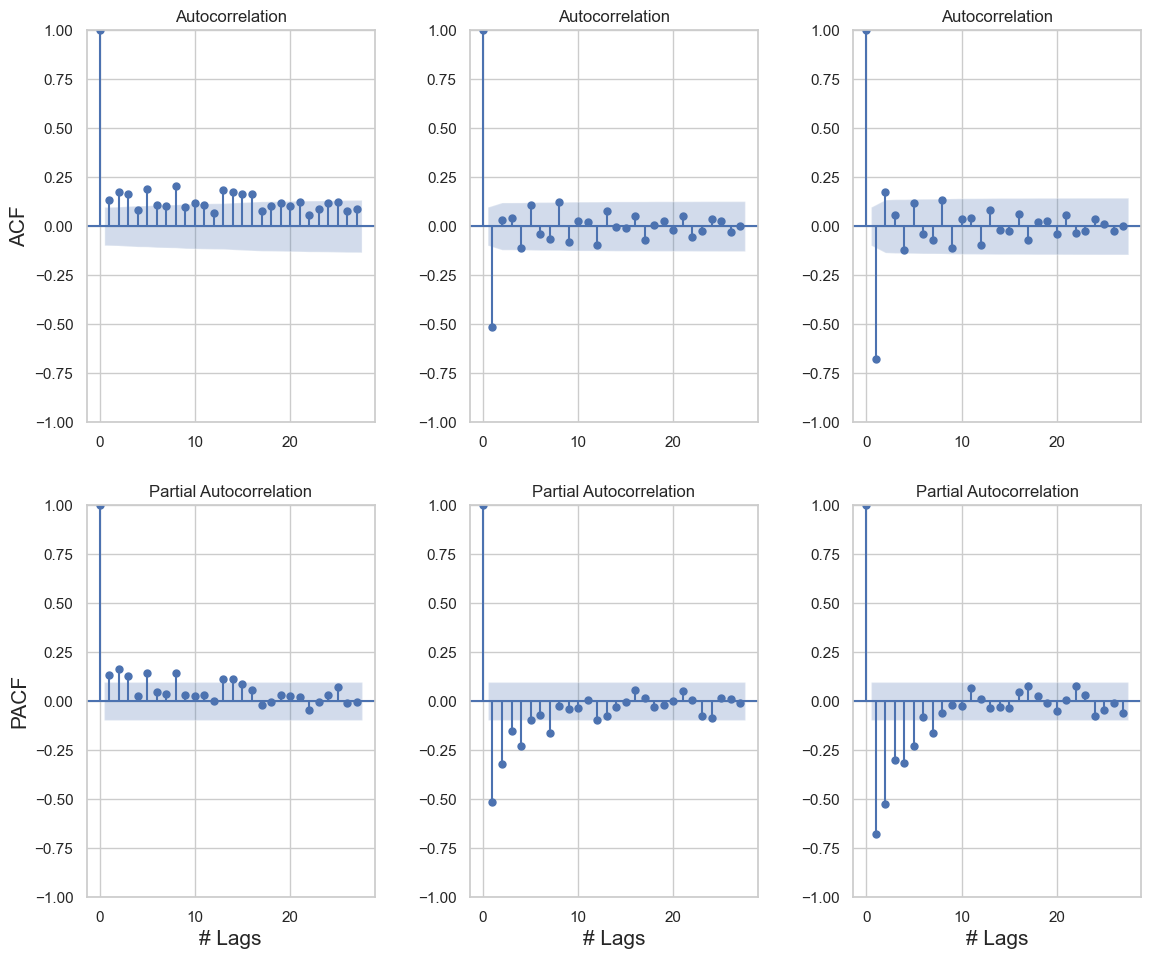

Results of Dickey-Fuller Test:
Test Statistic                  -4.173249
p-value                          0.000731
#Lags Used                       7.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64
Test Statistic                  -4.173249
p-value                          0.000731
#Lags Used                       7.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.173249
p-value                          0.000731
#Lags Used                       7.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64
Results of 

In [56]:
# Correct plot of figures

fig,axes = plt.subplots(2,3,figsize=(12,10))
fig.tight_layout(pad=3)
axes[0,0].set_title('ACF sem diferencial', fontsize=10)
axes[0,0].set_ylabel('ACF', fontsize=15)
axes[0,1].set_title('PACF sem diferencial', fontsize=10)
axes[0,1].set_title('ACF Diferencial 1ª Ordem', fontsize = 10)
axes[0,2].set_title('ACF Diferencial 2ª Ordem', fontsize = 10)
axes[1,0].set_title('PACF sem diferencial', fontsize = 10)
axes[1,0].set_ylabel('PACF', fontsize = 15)
axes[1,1].set_title('PACF Diferencial 1ª Ordem', fontsize = 10)
axes[1,2].set_title('PACF Diferencial 2ª Ordem', fontsize = 10)
axes[1,0].set_xlabel('# Lags', fontsize = 15)
axes[1,1].set_xlabel('# Lags', fontsize = 15)
axes[1,2].set_xlabel('# Lags', fontsize = 15)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
try:
    plot_acf(dados_la['quant_'],ax=axes[0,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_la['quant_'].diff().dropna(),ax=axes[0,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_la['quant_'].diff().diff().dropna(),ax=axes[0,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_la['quant_'],ax=axes[1,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_la['quant_'].diff().dropna(),ax=axes[1,1]) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_la['quant_'].diff().diff().dropna(),ax=axes[1,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_la['quant_']))  
df = pd.DataFrame(adf_test(dados_la['quant_']),columns=['Sem Diferencial'])
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_la['quant_'].diff().dropna()))

print(adf_test(dados_la['quant_'].diff().diff().dropna()))

--------------------------------------------------
Gráfico de autocorrelação parcial
--------------------------------------------------


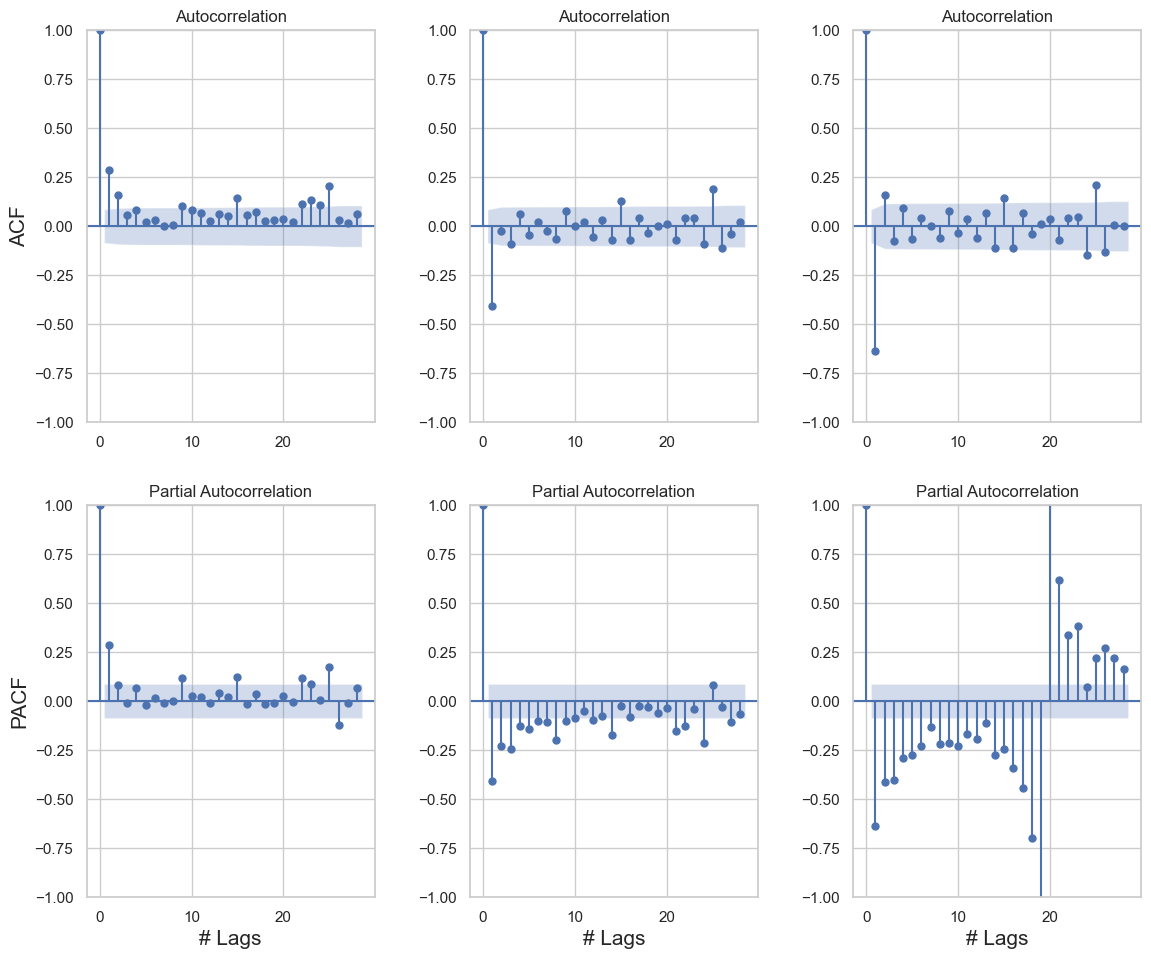

Results of Dickey-Fuller Test:
Test Statistic                -1.265682e+01
p-value                        1.331138e-23
#Lags Used                     1.000000e+00
Number of Observations Used    5.310000e+02
Critical Value (1%)           -3.442725e+00
Critical Value (5%)           -2.866998e+00
Critical Value (10%)          -2.569677e+00
dtype: float64
Test Statistic                -1.265682e+01
p-value                        1.331138e-23
#Lags Used                     1.000000e+00
Number of Observations Used    5.310000e+02
Critical Value (1%)           -3.442725e+00
Critical Value (5%)           -2.866998e+00
Critical Value (10%)          -2.569677e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.265682e+01
p-value                        1.331138e-23
#Lags Used                     1.000000e+00
Number of Observations Used    5.310000e+02
Critical Value (1%)           -3.442725e+00
Critical Value (5%)           -2.866998e+00
Critical Value (10%)        

In [57]:
# Correct plot of figures

fig,axes = plt.subplots(2,3,figsize=(12,10))
fig.tight_layout(pad=3)
axes[0,0].set_title('ACF sem diferencial', fontsize=10)
axes[0,0].set_ylabel('ACF', fontsize=15)
axes[0,1].set_title('PACF sem diferencial', fontsize=10)
axes[0,1].set_title('ACF Diferencial 1ª Ordem', fontsize = 10)
axes[0,2].set_title('ACF Diferencial 2ª Ordem', fontsize = 10)
axes[1,0].set_title('PACF sem diferencial', fontsize = 10)
axes[1,0].set_ylabel('PACF', fontsize = 15)
axes[1,1].set_title('PACF Diferencial 1ª Ordem', fontsize = 10)
axes[1,2].set_title('PACF Diferencial 2ª Ordem', fontsize = 10)
axes[1,0].set_xlabel('# Lags', fontsize = 15)
axes[1,1].set_xlabel('# Lags', fontsize = 15)
axes[1,2].set_xlabel('# Lags', fontsize = 15)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
try:
    plot_acf(dados_armarinho['quant_'],ax=axes[0,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_armarinho['quant_'].diff().dropna(),ax=axes[0,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_armarinho['quant_'].diff().diff().dropna(),ax=axes[0,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_armarinho['quant_'],ax=axes[1,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_armarinho['quant_'].diff().dropna(),ax=axes[1,1]) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_armarinho['quant_'].diff().diff().dropna(),ax=axes[1,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_armarinho['quant_']))  
df = pd.DataFrame(adf_test(dados_armarinho['quant_']),columns=['Sem Diferencial'])
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_armarinho['quant_'].diff().dropna()))

print(adf_test(dados_armarinho['quant_'].diff().diff().dropna()))

In [58]:
# table generation

dFrame1 = pd.DataFrame(index = ['Sem diferenciação', 'Primeira Ordem', 'Segunda Ordem'], columns=['Teste Estátisco', 'valor-p', '# Lags', 'Num. de Observações Apresentadas', 'Valor Crítico (1%)', 'Valor Crítico (5%)', 'Valor Crítico (10%)'])
dFrame2 = pd.DataFrame(index = ['Sem diferenciação', 'Primeira Ordem', 'Segunda Ordem'], columns=['Teste Estátisco', 'valor-p', '# Lags', 'Num. de Observações Apresentadas', 'Valor Crítico (1%)', 'Valor Crítico (5%)', 'Valor Crítico (10%)'])
dFrame3 = pd.DataFrame(index = ['Sem diferenciação', 'Primeira Ordem', 'Segunda Ordem'], columns=['Teste Estátisco', 'valor-p', '# Lags', 'Num. de Observações Apresentadas', 'Valor Crítico (1%)', 'Valor Crítico (5%)', 'Valor Crítico (10%)'])

for j in range(len(adf_test(dados_linha['quant_']))):
        dFrame1.iloc[0,j] = adf_test(dados_linha['quant_'])[j]
        dFrame1.iloc[1,j] = adf_test(dados_linha['quant_'].diff().dropna())[j]
        dFrame1.iloc[2,j] = adf_test(dados_linha['quant_'].diff().diff().dropna())[j]
        
for j in range(len(adf_test(dados_armarinho['quant_']))):
        dFrame2.iloc[0,j] = adf_test(dados_armarinho['quant_'])[j]
        dFrame2.iloc[1,j] = adf_test(dados_armarinho['quant_'].diff().dropna())[j]
        dFrame2.iloc[2,j] = adf_test(dados_armarinho['quant_'].diff().diff().dropna())[j]
        
for j in range(len(adf_test(dados_la['quant_']))):
        dFrame3.iloc[0,j] = adf_test(dados_la['quant_'])[j]
        dFrame3.iloc[1,j] = adf_test(dados_la['quant_'].diff().dropna())[j]
        dFrame3.iloc[2,j] = adf_test(dados_la['quant_'].diff().diff().dropna())[j]
        


Results of Dickey-Fuller Test:
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -3.499241
p-value                          0.008007
#Lags Used                      17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.114123e+01
p-value                        3.104675e-20
#Lags Used                     1.600000e+01
Number of Observations Used    5.200000e+02
Critical Value (1%)           -3.442988e+00
Critical Value (5%)           -2.867114e+00
Critical Value (10%)     

In [59]:
dFrame1

,Teste Estátisco,valor-p,# Lags,Num. de Observações Apresentadas,Valor Crítico (1%),Valor Crítico (5%),Valor Crítico (10%)
Sem diferenciação,-3.499241,0.008007,17.0,520.0,-3.442988,-2.867114,-2.569739
Primeira Ordem,-11.141228,0.0,16.0,520.0,-3.442988,-2.867114,-2.569739
Segunda Ordem,-12.252761,0.0,19.0,516.0,-3.443087,-2.867158,-2.569762


In [60]:
dFrame2

,Teste Estátisco,valor-p,# Lags,Num. de Observações Apresentadas,Valor Crítico (1%),Valor Crítico (5%),Valor Crítico (10%)
Sem diferenciação,-12.656825,0.0,1.0,531.0,-3.442725,-2.866998,-2.569677
Primeira Ordem,-11.313882,0.0,13.0,518.0,-3.443037,-2.867136,-2.56975
Segunda Ordem,-11.761198,0.0,18.0,512.0,-3.443187,-2.867202,-2.569785


In [61]:
dFrame3

,Teste Estátisco,valor-p,# Lags,Num. de Observações Apresentadas,Valor Crítico (1%),Valor Crítico (5%),Valor Crítico (10%)
Sem diferenciação,-4.173249,0.000731,7.0,398.0,-3.446888,-2.868829,-2.570653
Primeira Ordem,-9.472377,0.0,13.0,391.0,-3.447186,-2.86896,-2.570723
Segunda Ordem,-9.793417,0.0,18.0,385.0,-3.44745,-2.869077,-2.570785


In [62]:
'''fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)
fig.suptitle('Análise das vendas de Lã', fontsize=16)
axes[0,0].set_title('Quantidade vendas x categoria')
axes[0,0].set_ylabel('Saída de produtos')
axes[0,1].set_title('Diferencial 1ª Ordem')
axes[0,2].set_title('Diferencial 2ª Ordem')
axes[1,0].set_title('ACF sem diferencial')
axes[1,0].set_ylabel('ACF')
axes[1,1].set_title('ACF Diferencial 1ª Ordem')
axes[1,2].set_title('ACF Diferencial 2ª Ordem')
axes[2,0].set_title('PACF sem diferencial')
axes[2,0].set_ylabel('PACF')
axes[2,1].set_title('PACF Diferencial 1ª Ordem')
axes[2,2].set_title('PACF Diferencial 2ª Ordem')
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
print('Gráfico de Qtd de vendas por categoria')
try:
    sns.lineplot(x='mes_ano', y=(dados_la['quant_']), data=dados_la,ax=axes[0,0]) #0
    sns.lineplot(x='mes_ano', y=(dados_la['quant_'].diff()), data=dados_la,ax=axes[0,1]) #0
    sns.lineplot(x='mes_ano', y=(dados_la['quant_'].diff().diff()), data=dados_la,ax=axes[0,2]) #   
except:
    print('Não há dados para essa categoria')
print('-'*50)
print('Gráficos de autocorrelação e autocorrelação parcial')
print('-'*50)
print('Gráfico de autocorrelação')
try:
    plot_acf(dados_la['quant_'],ax=axes[1,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_la['quant_'].diff().dropna(),ax=axes[1,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_la['quant_'].diff().diff().dropna(),ax=axes[1,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_la['quant_'],ax=axes[2,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_la['quant_'].diff().dropna(),ax=axes[2,1] ) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_la['quant_'].diff().diff().dropna(),ax=axes[2,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_la['quant_']))  
#df = pd.DataFrame(adf_test(dados_la['quant_']))
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_la['quant_'].diff().dropna()))
print(adf_test(dados_la['quant_'].diff().diff().dropna()))'''

"fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)\nfig.suptitle('Análise das vendas de Lã', fontsize=16)\naxes[0,0].set_title('Quantidade vendas x categoria')\naxes[0,0].set_ylabel('Saída de produtos')\naxes[0,1].set_title('Diferencial 1ª Ordem')\naxes[0,2].set_title('Diferencial 2ª Ordem')\naxes[1,0].set_title('ACF sem diferencial')\naxes[1,0].set_ylabel('ACF')\naxes[1,1].set_title('ACF Diferencial 1ª Ordem')\naxes[1,2].set_title('ACF Diferencial 2ª Ordem')\naxes[2,0].set_title('PACF sem diferencial')\naxes[2,0].set_ylabel('PACF')\naxes[2,1].set_title('PACF Diferencial 1ª Ordem')\naxes[2,2].set_title('PACF Diferencial 2ª Ordem')\nfig.subplots_adjust(hspace=0.5)\nfig.subplots_adjust(wspace=0.5)\n    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')\n    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   \n    #ax, fig = matplotlib.figure(size(Fig[4,4]))\n    #\n    #For i in range(len(Fig[4,4])\n    #    For j in range(len(Fig[4,4]))\n    # 

In [63]:
'''fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)
fig.suptitle('Análise das vendas de Armarinho', fontsize=12)
fig.suptitle('Análise das vendas de Linhas', fontsize=12)
axes[0,0].set_title('Quantidade vendas x categoria', fontsize=10)
axes[0,0].set_xlabel('Ano/mês', fontsize=10)
axes[0,0].set_ylabel('Saída de produtos', fontsize=10)
axes[0,1].set_title('Diferencial 1ª Ordem', fontsize=10)
axes[0,1].set_xlabel('Ano/mês', fontsize=10)
axes[0,2].set_title('Diferencial 2ª Ordem', fontsize=10)
axes[0,2].set_xlabel('Ano/mês', fontsize=10)
axes[1,0].set_title('ACF sem diferencial', fontsize=10)
axes[1,0].set_ylabel('ACF', fontsize=10)
axes[2,0].set_title('PACF sem diferencial', fontsize=10)
axes[2,0].set_ylabel('PACF', fontsize=10)

fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   
    #ax, fig = matplotlib.figure(size(Fig[4,4]))
    #
    #For i in range(len(Fig[4,4])
    #    For j in range(len(Fig[4,4]))
    #        fig.plot(lista_plots[i][j])
    #        ax.plot(fig[i,j])
print('Gráfico de Qtd de vendas por categoria')
try:
    sns.lineplot(x='mes_ano', y=(dados_armarinho['quant_']), data=dados_armarinho,ax=axes[0,0]) #0
    sns.lineplot(x='mes_ano', y=(dados_armarinho['quant_'].diff()), data=dados_armarinho,ax=axes[0,1]) #0
    sns.lineplot(x='mes_ano', y=(dados_armarinho['quant_'].diff().diff()), data=dados_armarinho,ax=axes[0,2]) #   
except:
    print('Não há dados para essa categoria')
print('-'*50)
print('Gráficos de autocorrelação e autocorrelação parcial')
print('-'*50)
print('Gráfico de autocorrelação')
try:
    plot_acf(dados_armarinho['quant_'],ax=axes[1,0])    #1
except:
    print('Erro ao plotar autocorrelação')
try:
    plot_acf(dados_armarinho['quant_'].diff().dropna(),ax=axes[1,1]) #2
except:
    print('Erro ao plotar autocorrelação')
try:    
    plot_acf(dados_armarinho['quant_'].diff().diff().dropna(),ax=axes[1,2]) #3
except:
    print('Erro ao plotar autocorrelação')
print('-'*50)
print('Gráfico de autocorrelação parcial')
try:
    plot_pacf(dados_armarinho['quant_'],ax=axes[2,0]) #4
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_armarinho['quant_'].diff().dropna(),ax=axes[2,1] ) #5
except:
    print('Erro ao plotar autocorrelação parcial')
try:    
    plot_pacf(dados_armarinho['quant_'].diff().diff().dropna(),ax=axes[2,2]) #6
except:
    print('Erro ao plotar autocorrelação parcial')
print('-'*50)
plt.show()

print(adf_test(dados_armarinho['quant_']))  
#df = pd.DataFrame(adf_test(dados_armarinho['quant_']))
#rename col 1 to 
#df_stactionarity = df_stactionarity.append(df)
print(adf_test(dados_armarinho['quant_'].diff().dropna()))
print(adf_test(dados_armarinho['quant_'].diff().diff().dropna()))'''

"fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)\nfig.suptitle('Análise das vendas de Armarinho', fontsize=12)\nfig.suptitle('Análise das vendas de Linhas', fontsize=12)\naxes[0,0].set_title('Quantidade vendas x categoria', fontsize=10)\naxes[0,0].set_xlabel('Ano/mês', fontsize=10)\naxes[0,0].set_ylabel('Saída de produtos', fontsize=10)\naxes[0,1].set_title('Diferencial 1ª Ordem', fontsize=10)\naxes[0,1].set_xlabel('Ano/mês', fontsize=10)\naxes[0,2].set_title('Diferencial 2ª Ordem', fontsize=10)\naxes[0,2].set_xlabel('Ano/mês', fontsize=10)\naxes[1,0].set_title('ACF sem diferencial', fontsize=10)\naxes[1,0].set_ylabel('ACF', fontsize=10)\naxes[2,0].set_title('PACF sem diferencial', fontsize=10)\naxes[2,0].set_ylabel('PACF', fontsize=10)\n\nfig.subplots_adjust(hspace=0.5)\nfig.subplots_adjust(wspace=0.5)\n    ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')\n    ##axes[4].set_xlabel('Quantidade de produtos vendidos')   \n    #ax, fig = matplotlib.

In [64]:
''' Método para Ampliação do estudo'''
#sns timeplot hue categoria dataframe_transacoes_produto_tratado_2 by venda and data
'''
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 45, 'font.weight': 'bold', 'font.family': 'sans-serif', 'font.sans-serif': 'Arial'})
tbl_testes = pd.DataFrame(columns=['categoria','adf','adf2','adf3','pvvalue','pvvalue2','pvvalue3','critical_value','critical_value2','critical_value3'])
tbl_testes_temp = pd.DataFrame(columns=['categoria','adf','adf2','adf3','pvvalue','pvvalue2','pvvalue3','critical_value','critical_value2','critical_value3'])
#Lista_plots = [1,2,3,4,6,7]
#create a time plot 



for categoria in dados_modelo['categoria'].unique():
    dados_modelo_categoria =dados_modelo[dados_modelo['categoria'] == categoria]
    print(categoria.upper())
    
    fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)
    axes[0,0].set_title('Quantidade vendas x categoria')
    axes[0,0].set_ylabel('Saída de produtos')
    axes[0,0].set_title(categoria.upper())
    axes[0,1].set_title('Diferencial 1ª Ordem')
    axes[0,2].set_title('Diferencial 2ª Ordem')
    axes[1,0].set_title('ACF sem diferencial')
    axes[1,0].set_ylabel('ACF')
    axes[1,1].set_title('ACF Diferencial 1ª Ordem')
    axes[1,2].set_title('ACF Diferencial 2ª Ordem')
    axes[2,0].set_title('PACF sem diferencial')
    axes[2,0].set_ylabel('PACF')
    axes[2,1].set_title('PACF Diferencial 1ª Ordem')
    axes[2,2].set_title('PACF Diferencial 2ª Ordem')
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

        ##axes[4].set_title('Auto Correlação parcial com diferenciação de segunda ordem')
        ##axes[4].set_xlabel('Quantidade de produtos vendidos')   

        #ax, fig = matplotlib.figure(size(Fig[4,4]))
        #
        #For i in range(len(Fig[4,4])
        #    For j in range(len(Fig[4,4]))
        #        fig.plot(lista_plots[i][j])
        #        ax.plot(fig[i,j])
    print('Gráfico de Qtd de vendas por categoria')
    try:
        sns.lineplot(x='data_dia', y=(dados_modelo_categoria['quant_']), data=dados_modelo_categoria,ax=axes[0,0]) #0
        sns.lineplot(x='data_dia', y=(dados_modelo_categoria['quant_'].diff()), data=dados_modelo_categoria,ax=axes[0,1]) #0
        sns.lineplot(x='data_dia', y=(dados_modelo_categoria['quant_'].diff().diff()), data=dados_modelo_categoria,ax=axes[0,2]) #   
    except:
        print('categoria {0} não possui dados suficientes para plotar gráfico'.format(categoria)) 
    
    print('-'*50)
    print('Gráficos de autocorrelação e autocorrelação parcial')
    print('-'*50)
    print('Gráfico de autocorrelação')
    try:
        plot_acf(dados_modelo_categoria['quant_'],ax=axes[1,0])    #1
    except:
        print('Erro ao plotar autocorrelação')
    try:
        plot_acf(dados_modelo_categoria['quant_'].diff().dropna(),ax=axes[1,1]) #2
    except:
        print('Erro ao plotar autocorrelação')
    try:    
        plot_acf(dados_modelo_categoria['quant_'].diff().diff().dropna(),ax=axes[1,2]) #3
    except:
        print('Erro ao plotar autocorrelação')
    print('-'*50)
    print('Gráfico de autocorrelação parcial')
    try:
        plot_pacf(dados_modelo_categoria['quant_'],ax=axes[2,0]) #4
    except:
        print('Erro ao plotar autocorrelação parcial')
    try:    
        plot_pacf(dados_modelo_categoria['quant_'].diff().dropna(),ax=axes[2,1] ) #5
    except:
        print('Erro ao plotar autocorrelação parcial')
    try:    
        plot_pacf(dados_modelo_categoria['quant_'].diff().diff().dropna(),ax=axes[2,2]) #6
    except:
        print('Erro ao plotar autocorrelação parcial')
    print('-'*50)
    plt.show()
    
    print('Teste de estacionariedade')
    print('-'*50)

    check_stationarity(dados_modelo_categoria['quant_'])
    tbl_testes_temp['categoria'] = categoria
    tbl_testes_temp['adf'] = check_stationarity(dados_modelo_categoria['quant_'])[0]
    tbl_testes_temp['adf2'] = check_stationarity(dados_modelo_categoria['quant_'])[1]
    tbl_testes_temp['adf3'] = check_stationarity(dados_modelo_categoria['quant_'])[2]
    tbl_testes_temp['pvvalue'] = check_stationarity(dados_modelo_categoria['quant_'])[3]
    tbl_testes_temp['pvvalue2'] = check_stationarity(dados_modelo_categoria['quant_'])[4]
    tbl_testes_temp['pvvalue3'] = check_stationarity(dados_modelo_categoria['quant_'])[5]
    tbl_testes_temp['critvalue'] = check_stationarity(dados_modelo_categoria['quant_'])[6]
    tbl_testes_temp['critvalue2'] = check_stationarity(dados_modelo_categoria['quant_'])[7]
    tbl_testes_temp['critvalue3'] = check_stationarity(dados_modelo_categoria['quant_'])[8]
    tbl_testes = tbl_testes.append(tbl_testes_temp)
   
#       
# 
# print('Decomposição da série temporal aditiva')
#   decompose = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='additive', period=30)
#   print('Decomposição da série temporal multiplicativa de primeira ordem')
#   decompose2 = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='aditive', period=30)
#   print('Decomposição da série temporal multiplicativa de segunda ordem')
#   decompose3 = seasonal_decompose(modelo_transac_prod_vendas_categoria['quant_'], model='aditive', period=30, extrapolate_trend='freq')

'''

'\nplt.style.use(\'seaborn-whitegrid\')\nplt.rcParams["figure.figsize"] = (10,8)\nplt.rcParams.update({\'font.size\': 45, \'font.weight\': \'bold\', \'font.family\': \'sans-serif\', \'font.sans-serif\': \'Arial\'})\ntbl_testes = pd.DataFrame(columns=[\'categoria\',\'adf\',\'adf2\',\'adf3\',\'pvvalue\',\'pvvalue2\',\'pvvalue3\',\'critical_value\',\'critical_value2\',\'critical_value3\'])\ntbl_testes_temp = pd.DataFrame(columns=[\'categoria\',\'adf\',\'adf2\',\'adf3\',\'pvvalue\',\'pvvalue2\',\'pvvalue3\',\'critical_value\',\'critical_value2\',\'critical_value3\'])\n#Lista_plots = [1,2,3,4,6,7]\n#create a time plot \n\n\n\nfor categoria in dados_modelo[\'categoria\'].unique():\n    dados_modelo_categoria =dados_modelo[dados_modelo[\'categoria\'] == categoria]\n    print(categoria.upper())\n    \n    fig,axes = plt.subplots(3,3,figsize=(15,15),dpi = 180)\n    axes[0,0].set_title(\'Quantidade vendas x categoria\')\n    axes[0,0].set_ylabel(\'Saída de produtos\')\n    axes[0,0].set_title(ca

In [96]:

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
modelo = dados_linha
dado_c1 = modelo[['data_dia','quant_']].groupby(['data_dia']).sum()
dado_c1 = dado_c1.reset_index()

dado_c1




,data_dia,quant_
0,2020-09-13,21.0
1,2020-09-14,41.0
2,2020-09-15,49.0
3,2020-09-16,38.0
4,2020-09-17,57.0
...,...,...
533,2022-07-26,18.0
534,2022-07-27,13.0
535,2022-07-28,8.0
536,2022-07-29,13.0


In [80]:

modelo_2 = dados_la
dado_c2 = modelo_2[['data_dia','quant_']].groupby(['data_dia']).sum()
dado_c2 = dado_c2.reset_index()
dado_c2 = dado_c2.set_index('data_dia')
dado_c2

modelo_3 = dados_armarinho
dado_c3 = modelo_3[['data_dia','quant_']].groupby(['data_dia']).sum()
dado_c3 = dado_c3.reset_index()
dado_c3 = dado_c3.set_index('data_dia')
dado_c3

,quant_
data_dia,
2020-09-13,9.0
2020-09-14,11.0
2020-09-15,25.0
2020-09-16,18.0
2020-09-17,29.0
...,...
2022-07-26,39.0
2022-07-27,35.5
2022-07-28,145.0


In [81]:

p = 1
q = 1
d = 4
arima_model1 = sm.tsa.arima.ARIMA(dado_c1, order=(p,q,d))
arima_model1.fit()
print(arima_model1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                 quant_   No. Observations:                  538
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -2012.479
Date:                Wed, 19 Oct 2022   AIC                           4036.959
Time:                        01:30:23   BIC                           4062.675
Sample:                             0   HQIC                          4047.019
                                - 538                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9656      0.085    -11.373      0.000      -1.132      -0.799
ma.L1         -0.0234      0.096     -0.245      0.807      -0.211       0.164
ma.L2         -0.9191      0.095     -9.649      0.0

In [82]:


import pmdarima as pm

model = pm.auto_arima(dado_c1, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4042.025, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4757.982, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4330.419, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4550.670, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4043.059, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4043.054, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4449.546, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4212.519, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4044.448, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4043.164, Time=0.37 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.294 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(1, 0, 1)   Log Likelihood        

In [109]:
p = range(0, 3)
d = range(0,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[1], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)


[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12)]

In [106]:
model =  sm.tsa.arima.ARIMA(dado_c1['quant_'], order=(1,0,1))
fit_model = model.fit()
d= fit_model.forecast(30, alpha=0.05)  # 95% conf   
dado_c1['predictions_arima'] = fit_model.predict(start = 0, end= 700, dynamic= False)
dado_c1

,data_dia,quant_,predictions,predictions_arima
0,2020-09-13,21.0,18.377355,18.377355
1,2020-09-14,41.0,18.873706,18.873706
2,2020-09-15,49.0,22.396885,22.396885
3,2020-09-16,38.0,26.043827,26.043827
4,2020-09-17,57.0,27.455846,27.455846
...,...,...,...,...
533,2022-07-26,18.0,14.524852,14.524852
534,2022-07-27,13.0,14.712423,14.712423
535,2022-07-28,8.0,14.654890,14.654890
536,2022-07-29,13.0,14.365317,14.365317


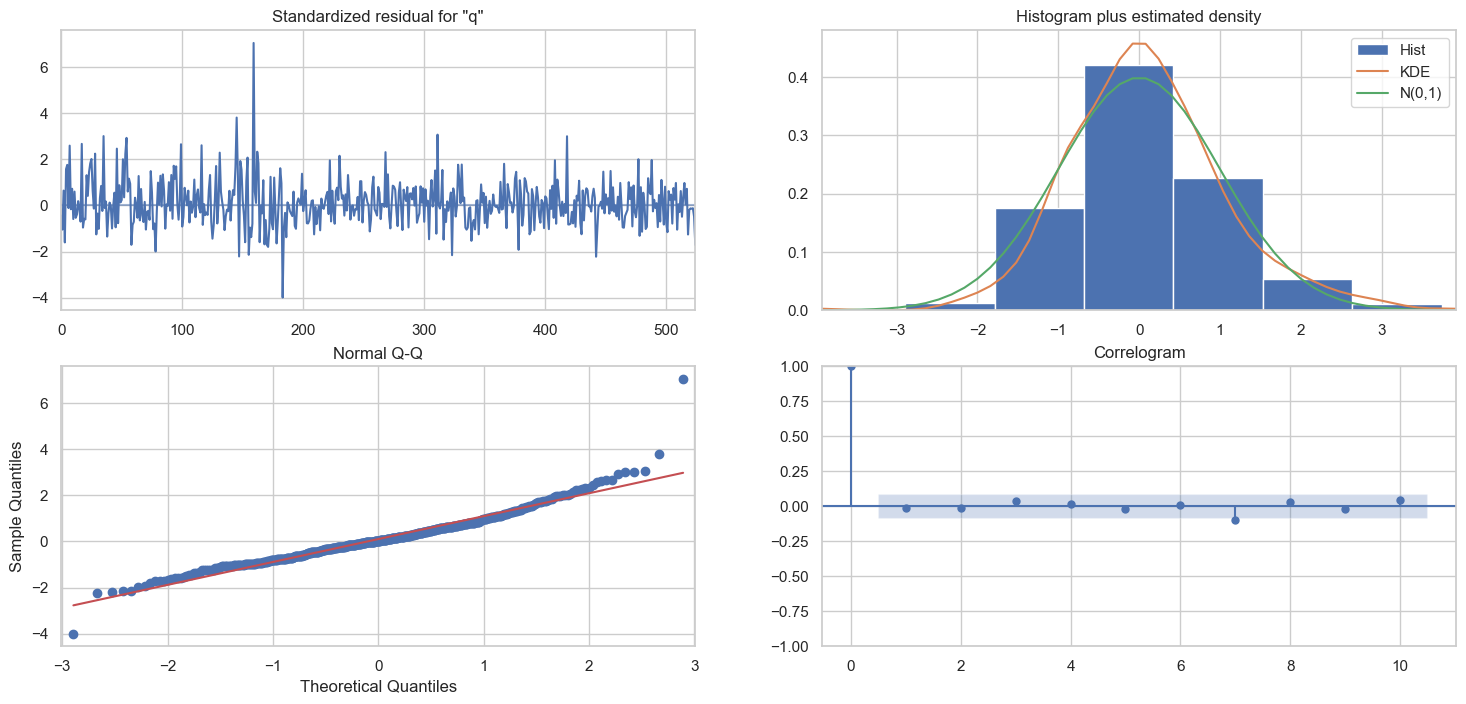

In [100]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
p = range(0, 3)
d = range(1,4)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:

p = 1
q = 1
d = 4
P = 1
Q = 1
D = 0
m = 12

sarima_model = sm.tsa.statespace.SARIMAX(dado_c1, order=(p,q,d), seasonal_order=(P,Q,D,m))
results = sarima_model.fit()
print(results.summary())


In [143]:

linha_forecasts = pd.date_range('2019-01-01', periods=600, freq='D')
linha_forecasts = pd.DataFrame(dates)
linha_forecasts['predictions'] = results.predict(start = 0, end= 600, dynamic= False)
linha_forecasts

,0,predictions
0,2019-01-01,0.000000
1,2019-01-02,20.997619
2,2019-01-03,40.995704
3,2019-01-04,48.998658
4,2019-01-05,38.002595
...,...,...
595,2020-08-18,7.931090
596,2020-08-19,11.399330
597,2020-08-20,9.434294
598,2020-08-21,2.315907


<AxesSubplot:ylabel='quant_'>

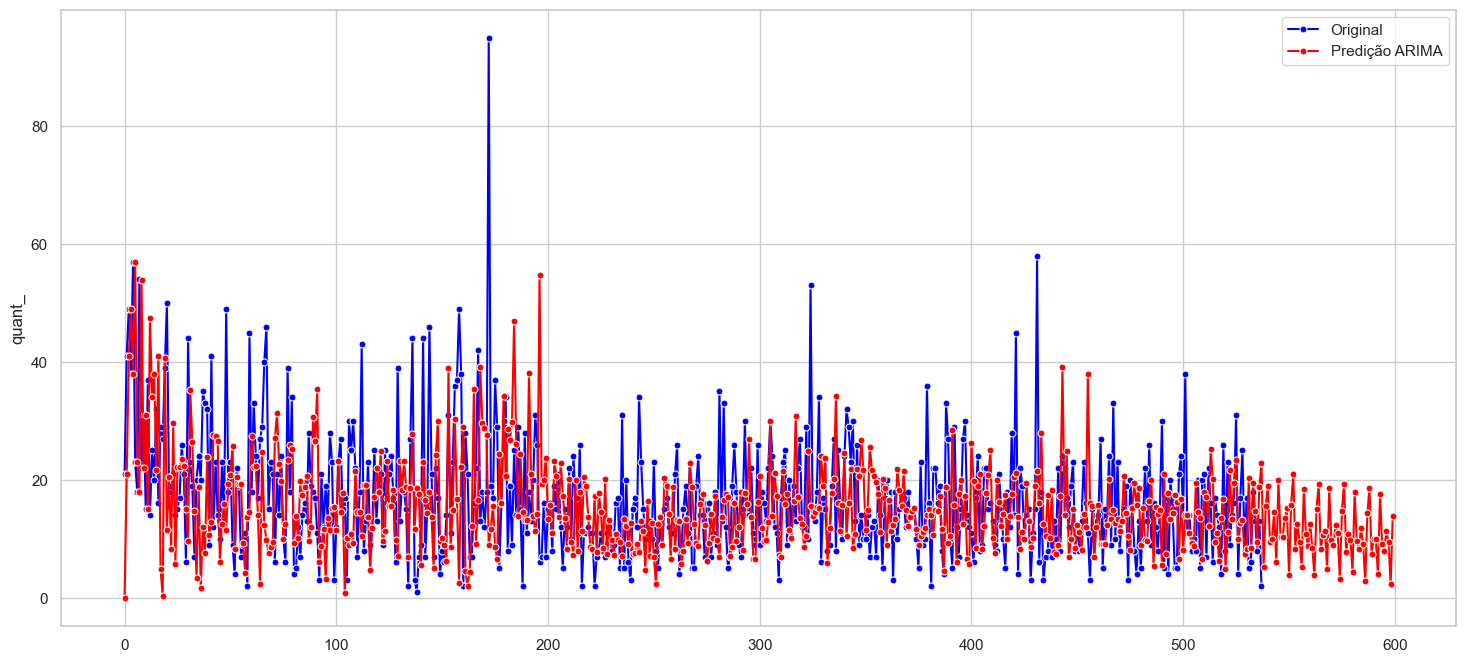

In [144]:


sns.lineplot(x=dado_c1.index, y=dado_c1['quant_'], data=dado_c1, label='Original', color='blue', marker='o', markersize=5)
sns.lineplot(x=linha_forecasts.index, y=linha_forecasts['predictions'], data=linha_forecasts, label='Predição ARIMA', color='red', marker='o', markersize=5)


In [59]:
MASE = mean_absolute_scaled_error(y, yhat)
print('MASE: %.3f' % MASE)


MASE: 2.574


In [56]:
def mean_absolute_scaled_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true - np.mean(y_true))))
    

In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
MAPE = mean_absolute_percentage_error(y, yhat)
print('MAPE: %.3f' % MAPE)

MAPE: 10.323
